In [2]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import re
params={
        'axes.labelsize':20,
        'xtick.labelsize':'large',
        'ytick.labelsize':'large',
        'xtick.direction':'in',
        'ytick.direction':'in',
        'xtick.minor.visible':True,
        'ytick.minor.visible':True,
        'xtick.top':True,
        'ytick.right':True,
        'xtick.labeltop':False,
        'ytick.labelright':False,
        'xtick.labelbottom':True,
        'ytick.labelleft':True,
        'xtick.major.size':10,
        'ytick.major.size':10,
        'xtick.minor.size':5,
        'ytick.minor.size':5,
        'xtick.major.width':1.5,
        'ytick.major.width':1.5,
        'xtick.minor.width':1,
        'ytick.minor.width':1,
        'errorbar.capsize':3,
        'legend.fontsize':'xx-large',
        'font.family':'serif',
        'mathtext.default':'it',
        'figure.subplot.wspace':0}
plt.rcParams.update(params)
%matplotlib widget

def extract_number(s):
    return float(re.search(r'\d+\.?\d*', s).group())

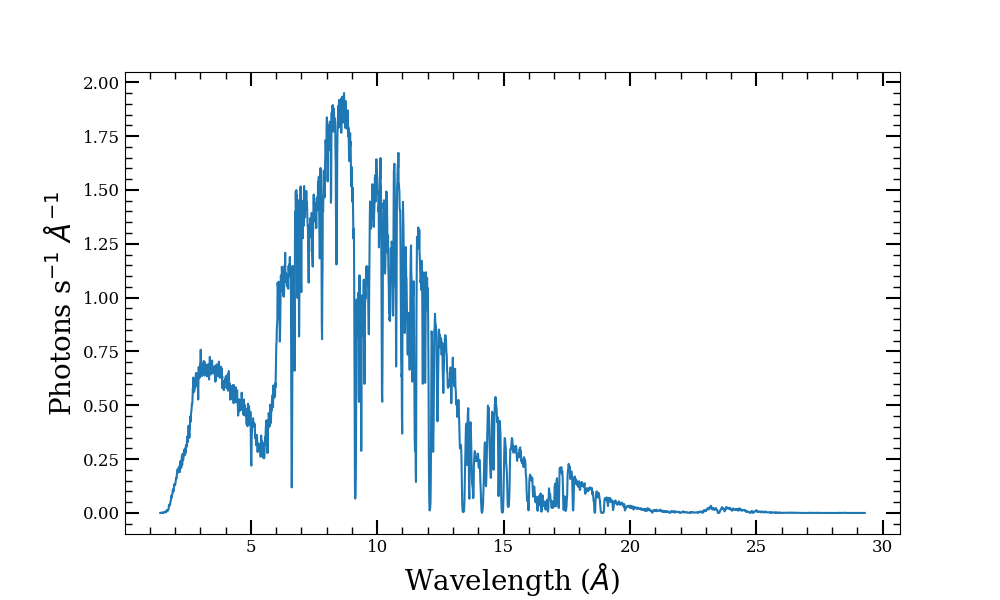

In [208]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-1/ang.qdp', skip_header=8)
x=data[:,0]
y=data[:,3]

plt.figure(figsize=(10, 6))
# plt.xlim(6.7,7.3)
# plt.xscale('log')
# plt.ylim(1e-3,1e3)
# plt.yscale('log')
plt.plot(x, y)
plt.xlabel('Wavelength ($\AA$)')
# plt.xlabel('Energy (keV)')
# plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
# plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$')
plt.ylabel('Photons s$^{-1}$ $\AA^{-1}$')
# plt.ylabel('Photons s$^{-1}$ keV$^{-1}$')
# plt.legend()
plt.savefig('ang.png',dpi=300)
plt.show()

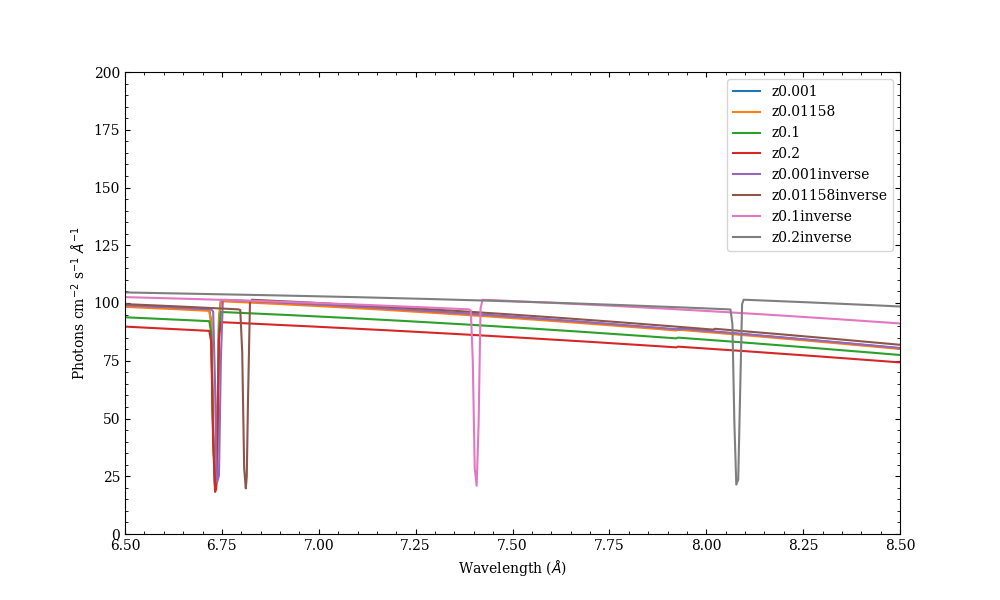

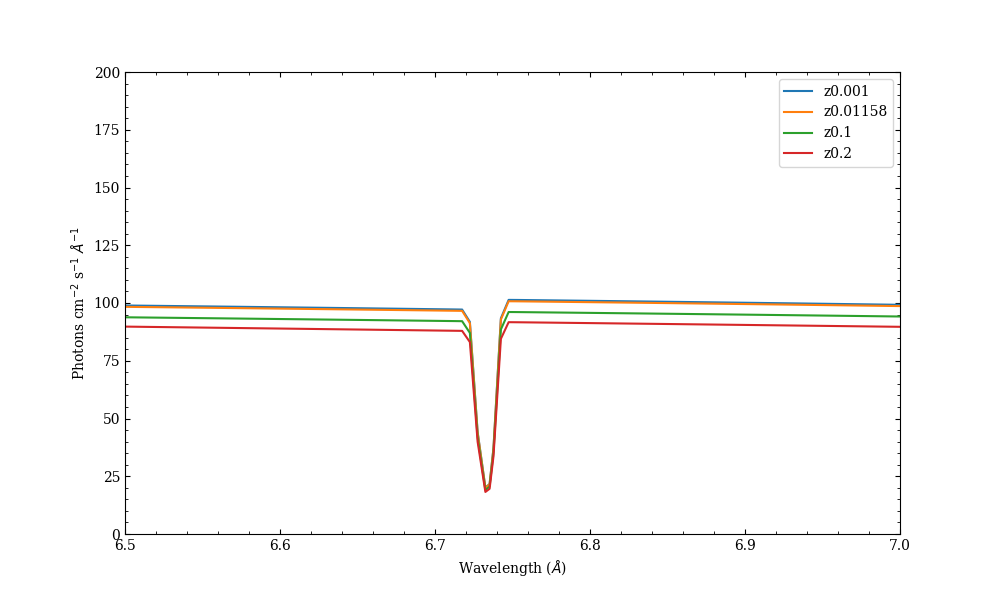

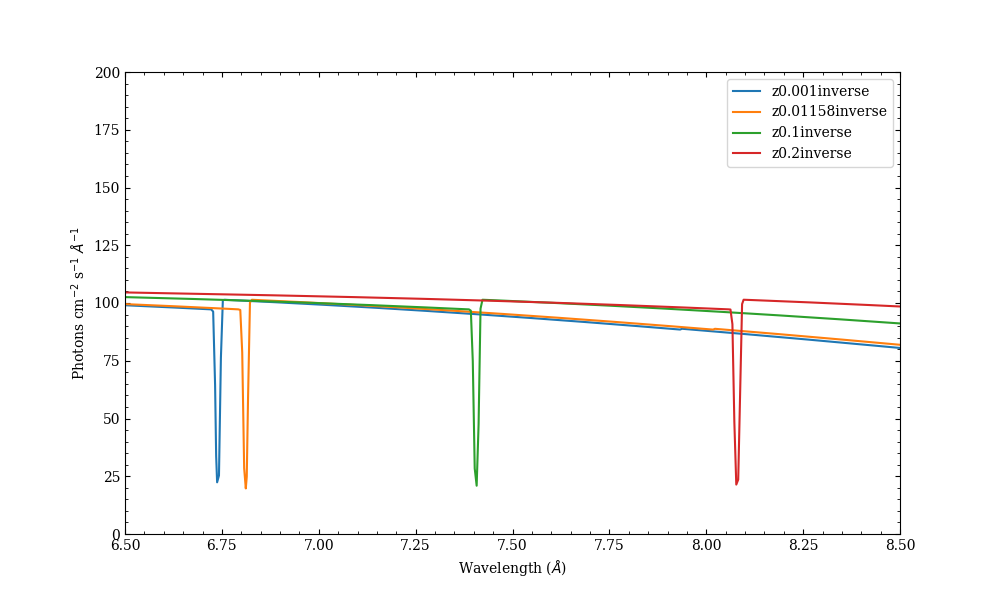

In [79]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/z_order'
filenames = os.listdir(folder_path)
inverse_filenames = [f for f in filenames if 'inverse' in f]
non_inverse_filenames = [f for f in filenames if 'inverse' not in f]
sorted_inverse_filenames = sorted(inverse_filenames, key=extract_number)
sorted_non_inverse_filenames = sorted(non_inverse_filenames, key=extract_number)
filenames = sorted_non_inverse_filenames + sorted_inverse_filenames
plt.figure(figsize=(10, 6))
# plt.yscale('log')
plt.xlim(6.5,8.5)
# plt.xscale('log')
plt.ylim(0,2e2)
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order.png',dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.xlim(6.5,7)
plt.ylim(0,2e2)
for i in range(math.ceil(len(filenames)/2)):
    file_path = os.path.join(folder_path, filenames[i])
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filenames[i][:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order_non_inverse.png',dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.xlim(6.5,8.5)
plt.ylim(0,2e2)
for i in range(math.ceil(len(filenames)/2),len(filenames)):
    file_path = os.path.join(folder_path, filenames[i])
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filenames[i][:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order_inverse.png',dpi=300)
plt.show()

 
6.74 x - 0.001678


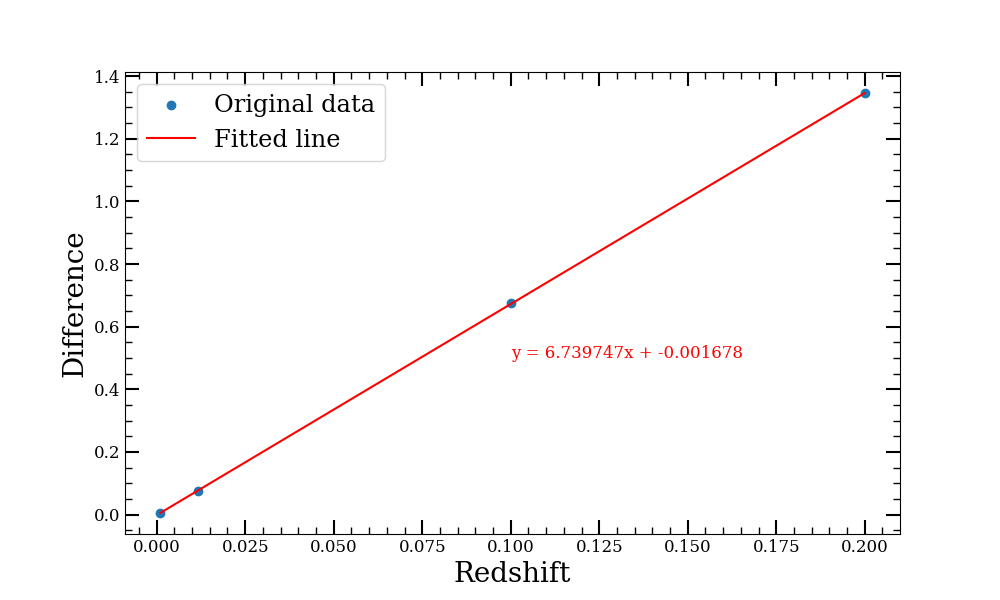

In [30]:
z = [0.001,0.01158,0.1,0.2]
delta = [0.005,0.075,0.675,1.345]

# 使用 numpy 的 polyfit 函数进行拟合，这里我们拟合一个一次多项式（线性拟合）
coefficients = np.polyfit(z, delta, 1)

# 使用 numpy 的 poly1d 函数得到多项式的表达式
polynomial = np.poly1d(coefficients)

# 打印多项式的表达式
print(polynomial)

# 生成拟合线的 x 和 y 坐标
z_fit = np.linspace(min(z), max(z), 100)
delta_fit = polynomial(z_fit)

# 绘制原始数据和拟合线
plt.figure(figsize=(10, 6))
plt.scatter(z, delta, label='Original data')
plt.plot(z_fit, delta_fit, color='red', label='Fitted line')
plt.text(0.1, 0.5, 'y = {:.6f}x + {:.6f}'.format(coefficients[0], coefficients[1]), fontsize=12, color='red')
plt.xlabel('Redshift')
plt.ylabel('Difference')
plt.legend()
plt.savefig('z_delta.png', dpi=300)
plt.show()

['1e-6.qdp', '1e-5.qdp', '1e-4.qdp', '1e-3.qdp', '1e-2.qdp', '1e-1.qdp']


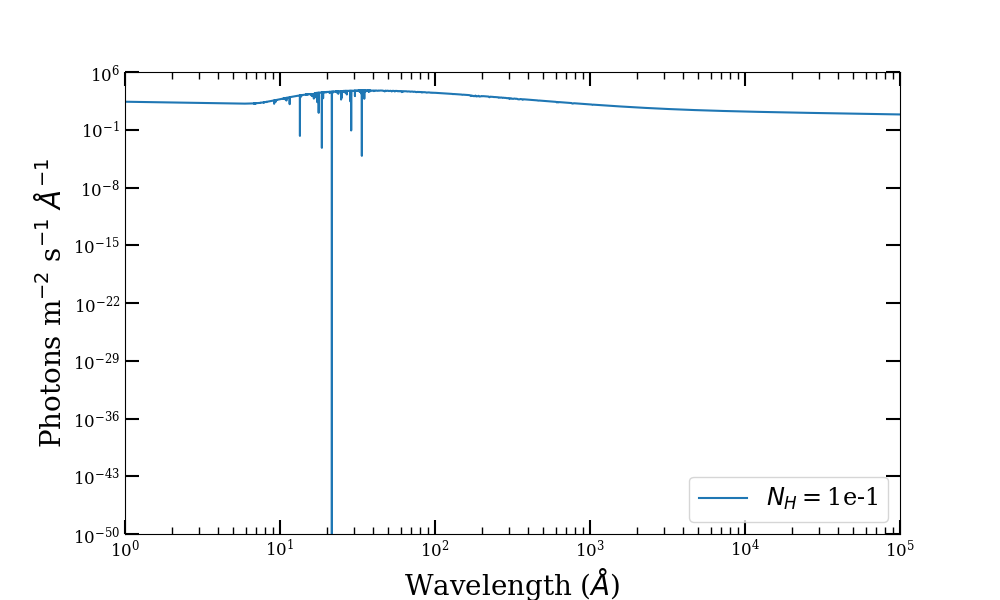

In [93]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/t-240621'
filenames = os.listdir(folder_path)
filenames = filenames[1:]
filenames = sorted(filenames, key=lambda x: float(x.split('.')[0]))
print(filenames)
filenames=filenames[5:]
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-50,1e6)
plt.xlim(1e0,1e5)
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label='$N_H=$'+filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_t-240621-6.png',dpi=300)
plt.show()

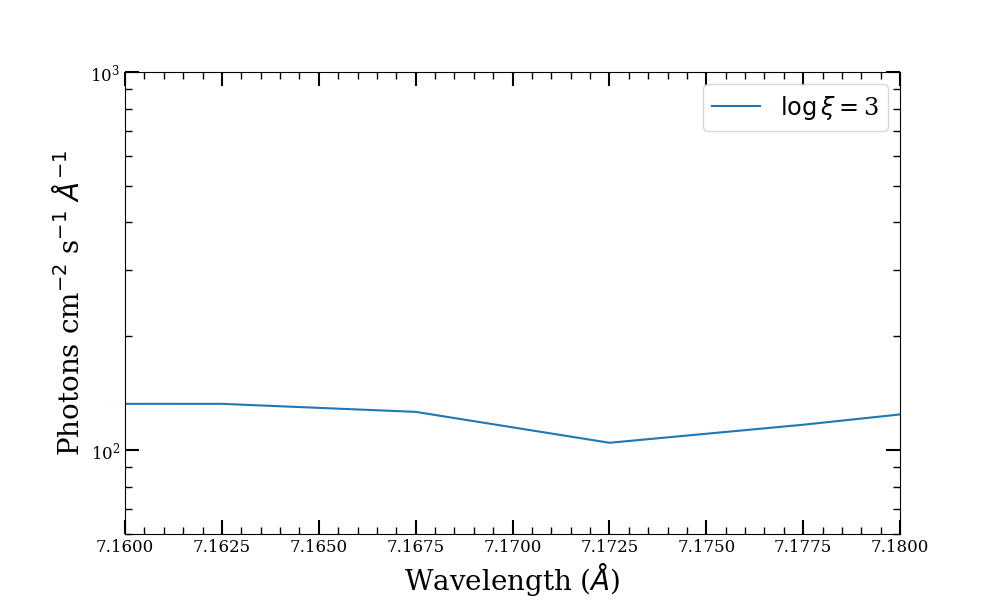

In [242]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/pion-xil-240623'
filenames = os.listdir(folder_path)
# filenames = filenames[1:]
filenames = sorted(filenames, key=lambda x: float(x.split('.')[0]))
filenames=filenames[3:-3]
# print(filenames)
plt.figure(figsize=(10, 6))
# plt.xscale('log')
plt.yscale('log')
# plt.xlim(6.6,7.3)
plt.xlim(7.16,7.18)
plt.ylim(6e1,1e3)
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label='$\\log \\xi=$'+filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
# plt.savefig('Difference_xil-pion-240623-zoom-in.png',dpi=300)
plt.show()

In [78]:
import numpy as np
np.sqrt(2.67E+37/(4*np.pi*2.136013E-08))

9.973526659930643e+21

In [211]:
import astropy.constants as const
import astropy.units as u

In [213]:
(const.h*const.c/(30*u.angstrom)).to(u.keV)

<Quantity 0.41328066 keV>

In [92]:
(const.h*const.c*const.Ryd).to(u.keV)

<Quantity 0.01360569 keV>

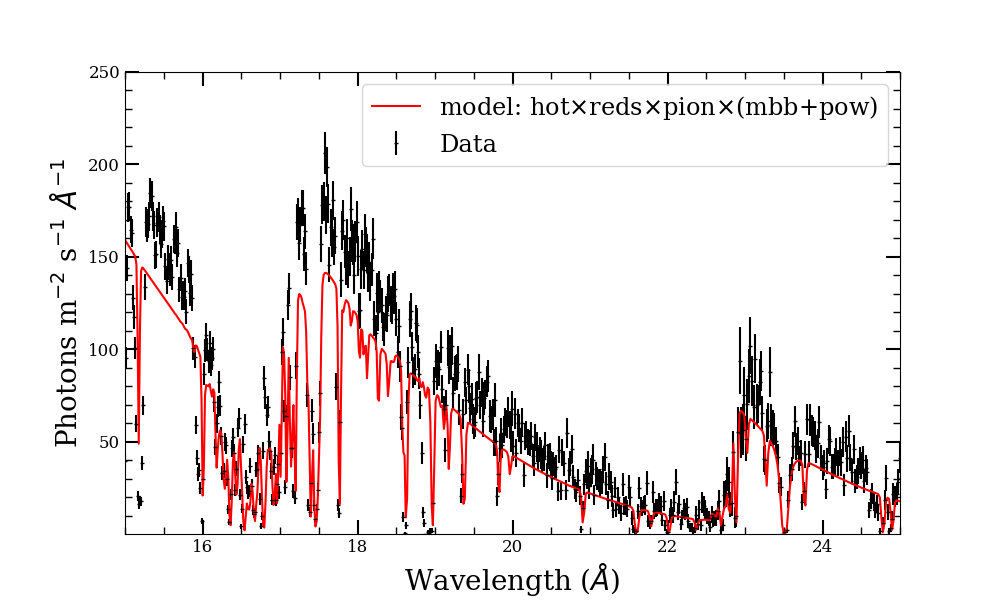

In [254]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-5-3.qdp', skip_header=8)
x=data[:,0]
y1=data[:,3]
y1_err1=data[:,4]
y1_err2=data[:,5]
y2=data[:,6]
# print(data[0:3])

plt.figure(figsize=(10, 6))
plt.errorbar(x, y1, yerr=[abs(y1_err2), y1_err1], fmt='_', capsize=0, color='black', label='Data', markersize=3)
# plt.plot(x,y1,label='Data')
plt.plot(x,y2,color='red',label='model: hot$\\times$reds$\\times$pion$\\times$(mbb+pow)')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.ylim(1e-3,250)
plt.xlim(15,25)
plt.legend()
plt.savefig('5-5-3-zoomin.png',dpi=300)
plt.show()

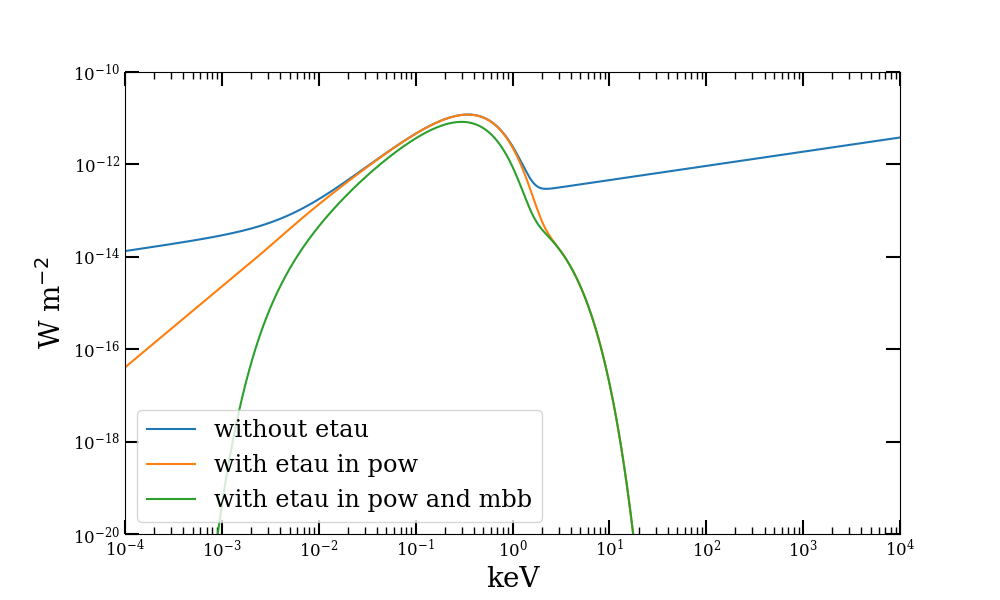

In [105]:
plt.figure(figsize=(10, 6))
# 读取每个文件
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-4-1.qdp', skip_header=4)
x=data[:,0]
y=data[:,3]
# # plt.plot(x, y)
plt.plot(x, y, label='without etau')
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-4-2.qdp', skip_header=4)
x=data[:,0]
y=data[:,3]
# plt.plot(x, y)
plt.plot(x, y, label='with etau in pow')
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-4-2-mbb.qdp', skip_header=4)
x=data[:,0]
y=data[:,3]
# plt.plot(x, y)
plt.plot(x, y, label='with etau in pow and mbb')
plt.yscale('log')
plt.xlim(1e-4,1e4)
plt.xscale('log')
plt.ylim(1e-20,1e-10)
plt.xlabel('keV')
plt.ylabel('W m$^{-2}$')
plt.legend()
# plt.savefig('5-4-1.png',dpi=300)
# plt.savefig('5-4-2-mbb.png',dpi=300)
plt.show()

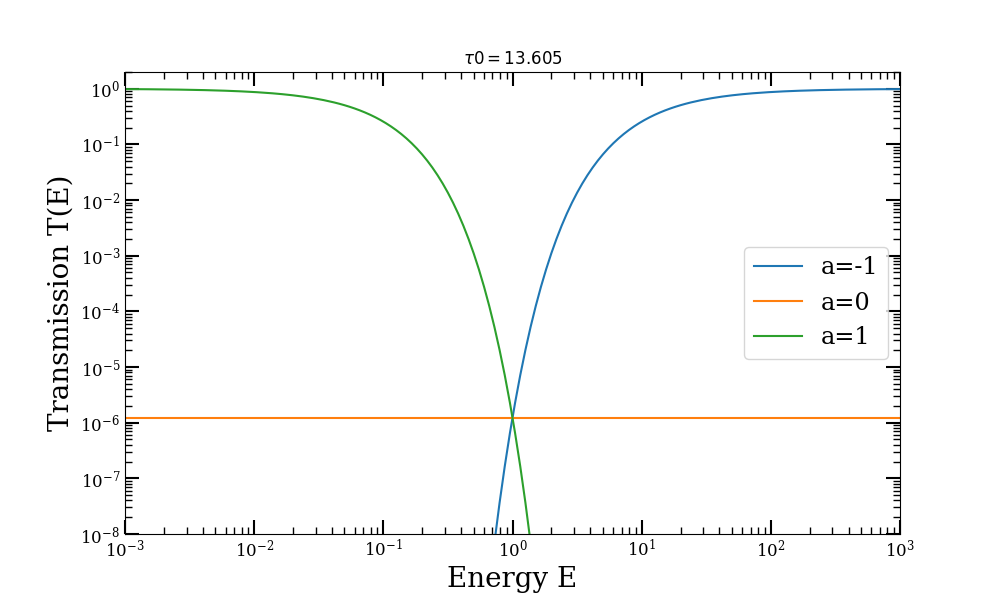

In [138]:
# 定义能量 E 的范围
E_min = 1e-20
E_max = 1e20
E=np.logspace(np.log10(E_min), np.log10(E_max), 1000)
# tau0=0.013605
tau0=13.605
a=-1
T_values = np.exp(-tau0 * E**a)  # 使用 numpy 中的指数函数来计算 e^(-τ0 * E^a)
# 绘制传输 T(E) 和光学深度 τ(E) 的曲线
plt.figure(figsize=(10, 6))
plt.plot(E, T_values, label='a=-1')
a=0
T_values = np.exp(-tau0 * E**a)
plt.plot(E, T_values, label='a=0')
a=1
T_values = np.exp(-tau0 * E**a)
plt.plot(E, T_values, label='a=1')

# tau0=13.605
# a=1
# T_values = np.exp(-tau0 * E**a)
# plt.plot(E, T_values, label='$\\tau 0=13.605, a=1$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e3)
plt.ylim(1e-8,2)
# 添加标题和标签
plt.title('$\\tau 0=13.605$')
plt.xlabel('Energy E')
plt.ylabel('Transmission T(E)')
plt.legend()
plt.savefig('T_E-13.605-zoomin.png',dpi=300)
# 显示图表
plt.show()


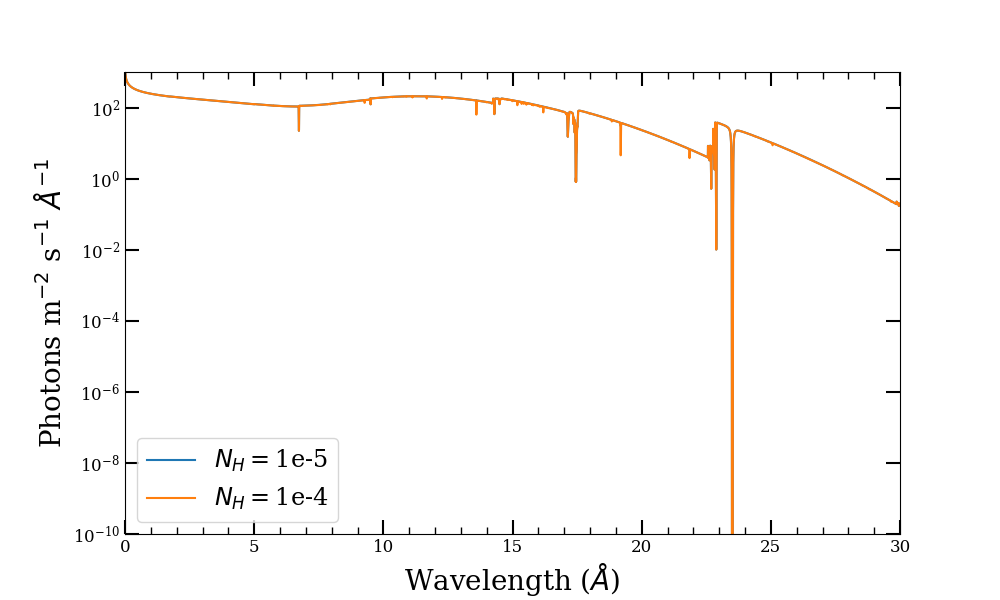

In [256]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/pion-nh-240701'
filenames = os.listdir(folder_path)
filenames = sorted(filenames, key=lambda x: float(x.split('.')[0]))
filenames=filenames[:2]
plt.figure(figsize=(10, 6))
plt.xlim(0,30)
# plt.xscale('log')
plt.ylim(1e-10,1e3)
plt.yscale('log')
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label='$N_H=$'+filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_NH-240701-1e-4.png',dpi=300)
plt.show()

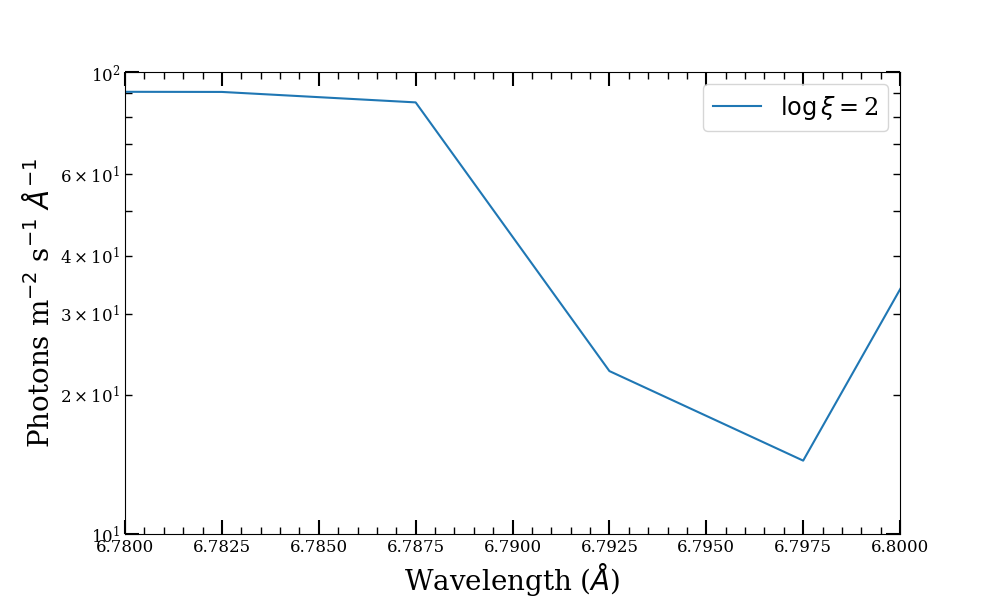

In [309]:
# data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-3-1model.qdp', skip_header=4)
# x1=data[:,0]
# y1=data[:,3]

# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/pion-xil-240701'
filenames = os.listdir(folder_path)
filenames = sorted(filenames, key=lambda x: float(x.split('.')[0]))
filenames=filenames[2:-3]
plt.figure(figsize=(10, 6))
plt.xlim(6.78,6.8)
# plt.xlim(0,30)
# plt.xscale('log')
plt.ylim(1e1,1e2)
plt.yscale('log')
# plt.plot(x1, y1, label='model: hot$\\times$reds$\\times$(mbb+pow)')
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label='$\\log \\xi=$'+filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
# plt.savefig('xil45-5-2-2.png',dpi=300)
plt.show()

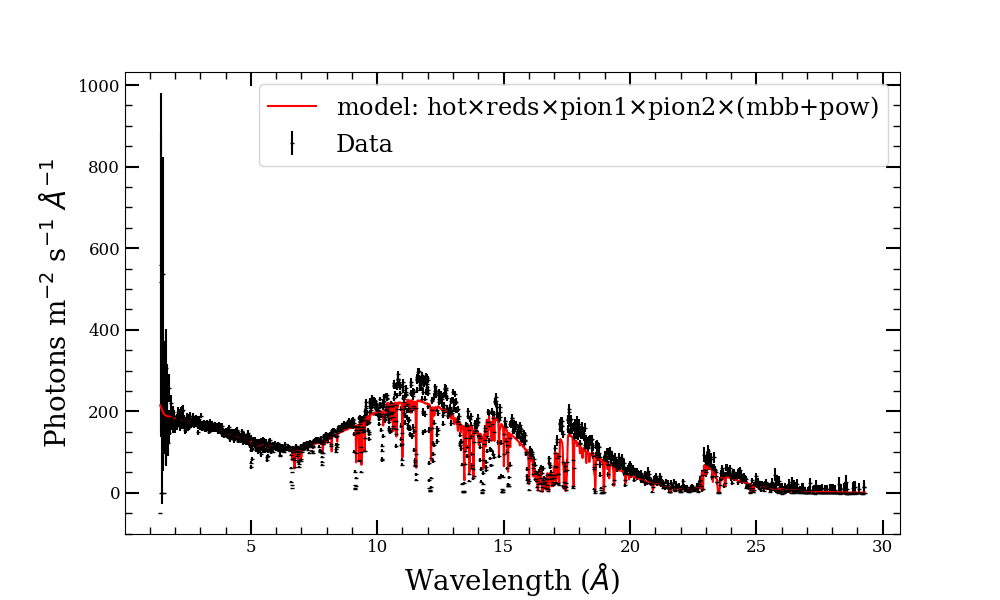

In [36]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-5-2.qdp', skip_header=8)
x=data[:,0]
y1=data[:,3]
y1_err1=data[:,4]
y1_err2=data[:,5]
y2=data[:,6]
# print(data[0:3])

plt.figure(figsize=(10, 6))
plt.errorbar(x, y1, yerr=[abs(y1_err2), y1_err1], fmt='_', capsize=0, color='black', label='Data', markersize=3)
# plt.plot(x,y1,label='Data')
plt.plot(x,y2,color='red',label='model: hot$\\times$reds$\\times$pion1$\\times$pion2$\\times$(mbb+pow)')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('5-5-2.png',dpi=300)
plt.show()

In [5]:
import astropy.constants as const
import astropy.units as u

(0.001*u.eV/const.k_B).to(u.K)

<Quantity 11.60451812 K>

In [6]:
(const.h*const.c/(21.6*u.angstrom)).to(u.keV)

<Quantity 0.57400092 keV>

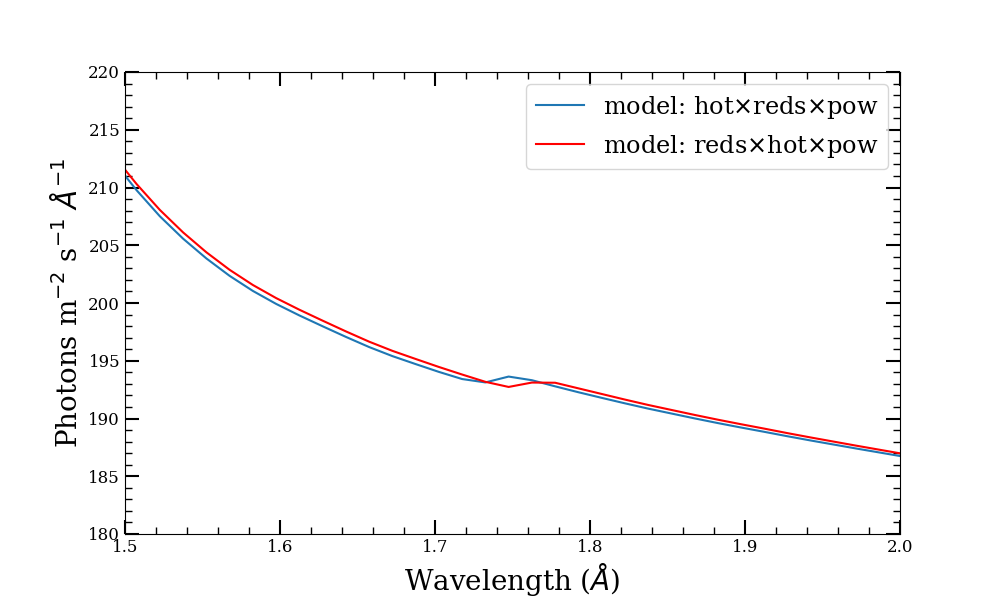

In [35]:
data1 = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-2-1.qdp', skip_header=8)
data2 = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-2-1inverse.qdp', skip_header=8)
x1=data1[:,0]
y1=data1[:,6]
x2=data2[:,0]
y2=data2[:,6]

plt.figure(figsize=(10, 6))
plt.plot(x1,y1,label='model: hot$\\times$reds$\\times$pow')
plt.plot(x2,y2,color='red',label='model: reds$\\times$hot$\\times$pow')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.xlim(1.5,2)
plt.ylim(180,220)
plt.legend()
plt.savefig('5-2-1comparison.png',dpi=300)
plt.show()

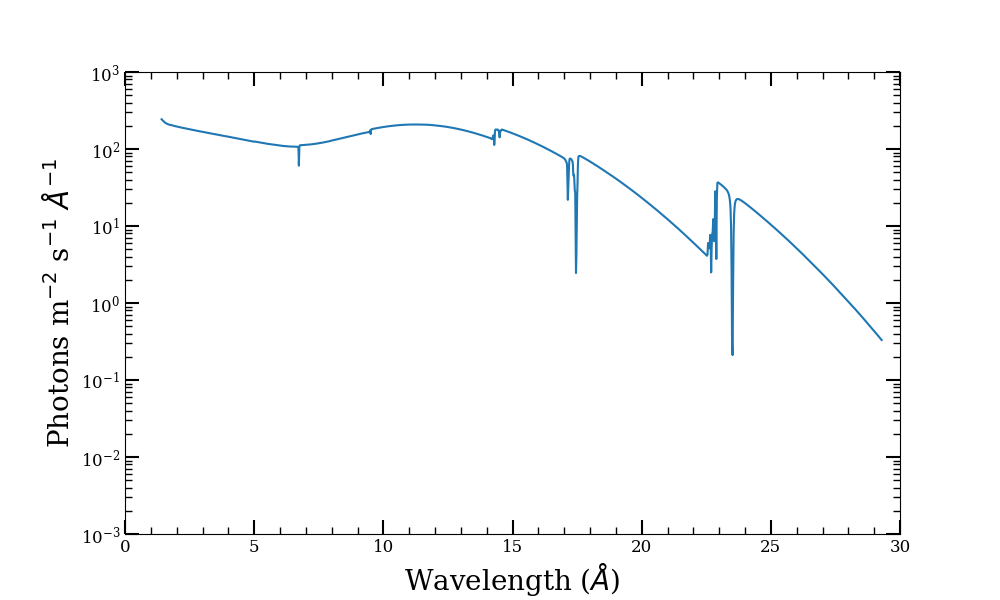

In [43]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-2-2.qdp', skip_header=8)
x=data[:,0]
y=data[:,6]

plt.figure(figsize=(10, 6))
# plt.xscale('log')
plt.xlim(0,30)
plt.ylim(1e-3,1000)
plt.yscale('log')
plt.plot(x, y)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
# plt.legend()
# plt.savefig('5-3-1model.png',dpi=300)
plt.show()

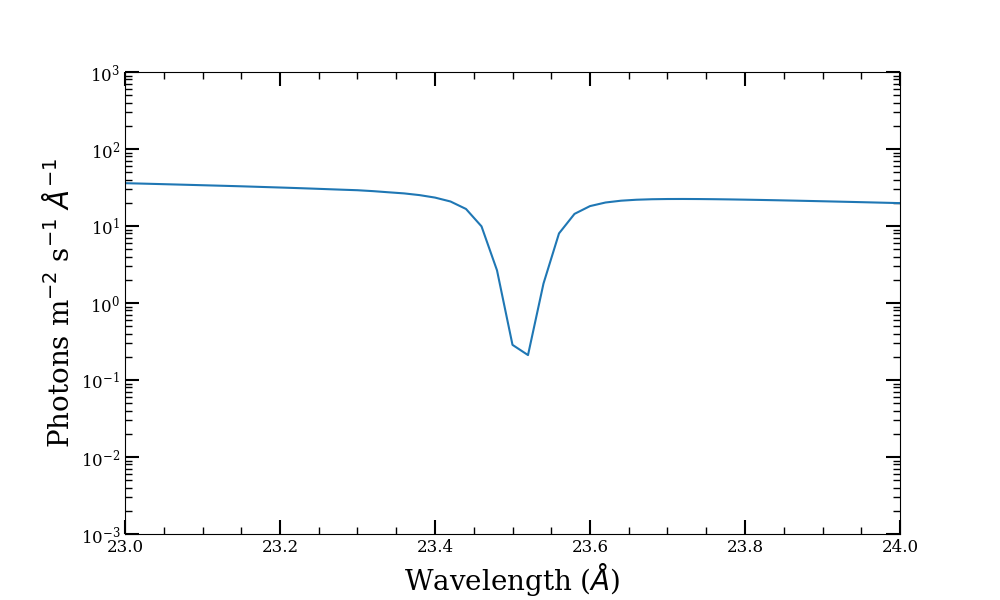

In [8]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-3-1.qdp', skip_header=4)
x=data[:,0]
y=data[:,6]

plt.figure(figsize=(10, 6))
# plt.xscale('log')
plt.xlim(23,24)
plt.ylim(1e-3,1000)
plt.yscale('log')
plt.plot(x, y)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
# plt.legend()
# plt.savefig('5-3-1.png',dpi=300)
plt.show()

[7.832911e+03 7.805229e+03 7.777646e+03 ... 1.633093e+00 1.627322e+00
 1.621571e+00]


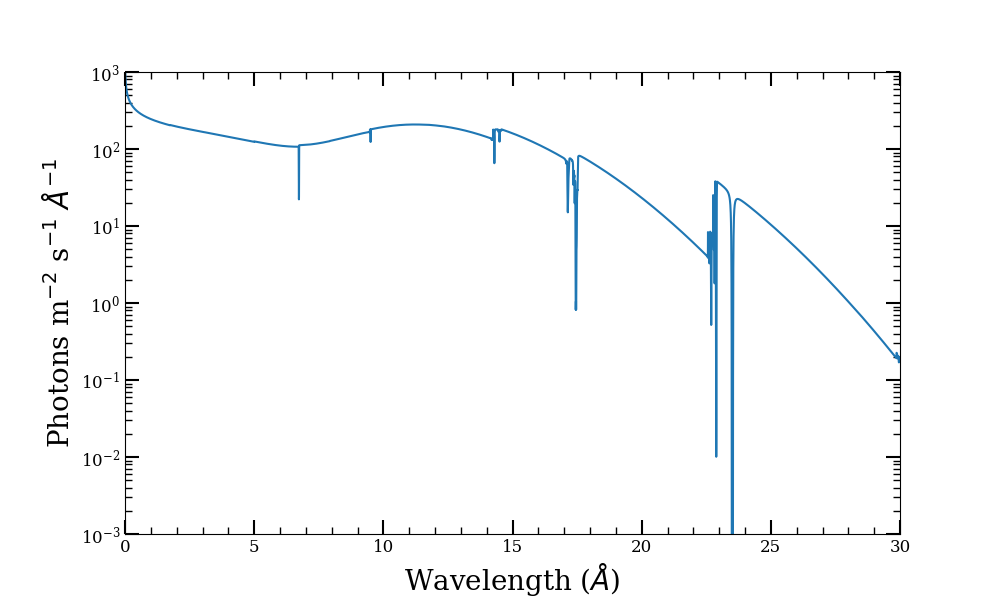

In [13]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-3-1model.qdp', skip_header=4)
x=data[:,0]
y=data[:,3]
print(y)

plt.figure(figsize=(10, 6))
# plt.xscale('log')
# plt.xlim(23,24)
plt.xlim(0,30)
plt.ylim(1e-3,1000)
plt.yscale('log')
plt.plot(x, y)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons m$^{-2}$ s$^{-1}$ $\AA^{-1}$')
# plt.legend()
# plt.savefig('5-3-1model.png',dpi=300)
plt.show()

In [34]:
data = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/data.qdp', skip_header=8)
model = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/pow-mbb.qdp', skip_header=8)
x=data[:,0:3]
y=data[:,0:3]
print(type(x),type(y))

is_equal = np.array_equal(x, y)

print(is_equal) # 如果 x 和 y 完全一致，将打印 True，否则打印 False

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
True


In [36]:
model1 = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/5-2-2.qdp', skip_header=8)
y1=model1[:,0:3]

# 打开一个 .qdp 文件并写入数据
with open('5-2-2data.qdp', 'w') as f:
    for row in y1:
        line = ' '.join(str(x) for x in row)
        f.write(line + '\n')
with open('data03.qdp', 'w') as f:
    for row in x:
        line = ' '.join(str(x) for x in row)
        f.write(line + '\n')

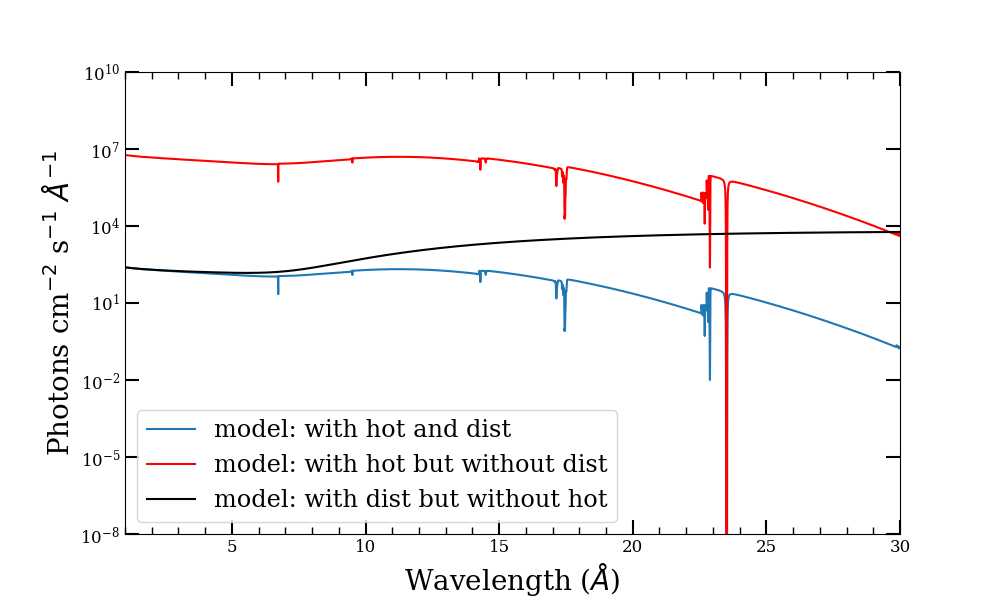

In [85]:
data1 = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/flux.qdp', skip_header=4)
data2 = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/flux-initial.qdp', skip_header=4)
data3 = np.genfromtxt('/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/flux-without-MW.qdp', skip_header=4)

x1=data1[:,0]
y1=data1[:,3]
x2=data2[:,0]
y2=data2[:,3]
x3=data3[:,0]
y3=data3[:,3]

plt.figure(figsize=(10, 6))
# plt.xscale('log')
plt.yscale('log')
plt.xlim(1,30)
plt.ylim(1e-8,1e10)
plt.plot(x1,y1,label='model: with hot and dist')
plt.plot(x,y2,color='red',label='model: with hot but without dist')
plt.plot(x,y3,color='black',label='model: with dist but without hot')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('flux.png',dpi=300)
plt.show()